In [2]:
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import csv

# Directories containing transcripted files
truthful_dir = '/content/drive/MyDrive/Real-life_Deception_Detection_2016/Transcription/Truthful'
deceptive_dir = '/content/drive/MyDrive/Real-life_Deception_Detection_2016/Transcription/Deceptive'

# Define the header for the CSV dataset
header = ['File Name', 'Transcript', 'Label']

# Initialize an empty list to store data
data = []


# Function to read transcripts from a directory and assign labels
def read_transcripts(directory, label):
    transcripts = []
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
            transcript_text = file.read()
        transcripts.append([filename ,transcript_text, label])
    return transcripts

# Read truthful and deceptive transcripts
truthful_transcripts = read_transcripts(truthful_dir, 'truthful')
deceptive_transcripts = read_transcripts(deceptive_dir, 'deceptive')

# Combine transcripts from both categories
data = truthful_transcripts + deceptive_transcripts

# Write data to CSV file
with open('dataset.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)  # Write header
    writer.writerows(data)   # Write data rows

In [5]:
import nltk

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
import pandas as pd

In [8]:
df= pd.read_csv('/content/dataset.csv')
df.head(5)

,File Name,Transcript,Label
0,trial_truth_002.txt,"All of us, who have represented people for yea...",truthful
1,trial_truth_001.txt,Reforming the criminal justice system matters ...,truthful
2,trial_truth_006.txt,They really didn't tell me anything. They said...,truthful
3,trial_truth_004.txt,"I do. I was, uh... in the office, and I got a ...",truthful
4,trial_truth_003.txt,"But yes, I was there. Yep, I stayed. Uh ... Ye...",truthful


In [9]:
df.isna().sum()

File Name     0
Transcript    0
Label         0
dtype: int64

In [10]:
print(f"Number of True statements: {df[df['Label'] == 'truthful'].shape[0]}")
print(f"Number of False statements: {df[df['Label'] == 'deceptive'].shape[0]}")

Number of True statements: 60
Number of False statements: 61


In [11]:
df.shape

(121, 3)

In [12]:
pip install spacy

In [13]:
import spacy
from collections import Counter

In [14]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
# Load Spacy's English language model
nlp = spacy.load("en_core_web_lg")

In [16]:
# Define a function to tokenize text
def tokenize(txt):
    # Remove punctuation and double space, and convert to lowercase:
    tokens = [token.text.lower() for token in txt if not (token.is_punct or token.is_space)]
    # Join tokens back into a string
    tokens = " ".join(tokens)
    return tokens

# Apply the preprocessing pipeline using nlp.pipe
tokenized_txt = []

for txt in nlp.pipe(df['Transcript']):
    tokenized_txt.append(tokenize(txt))

# Add the preprocessed text as a new column in the dataframe
df['tokenized_Transcript'] = tokenized_txt

In [17]:
df

,File Name,Transcript,Label,tokenized_Transcript
0,trial_truth_002.txt,"All of us, who have represented people for yea...",truthful,all of us who have represented people for year...
1,trial_truth_001.txt,Reforming the criminal justice system matters ...,truthful,reforming the criminal justice system matters ...
2,trial_truth_006.txt,They really didn't tell me anything. They said...,truthful,they really did n't tell me anything they said...
3,trial_truth_004.txt,"I do. I was, uh... in the office, and I got a ...",truthful,i do i was uh in the office and i got a call u...
4,trial_truth_003.txt,"But yes, I was there. Yep, I stayed. Uh ... Ye...",truthful,but yes i was there yep i stayed uh yep prob y...
...,...,...,...,...
116,trial_lie_054.txt,... Do I believe the evidence that supports do...,deceptive,do i believe the evidence that supports domest...
117,trial_lie_055.txt,"There was a lot of talk about me being, you kn...",deceptive,there was a lot of talk about me being you kno...
118,trial_lie_059.txt,...um person in the congregation was involved ...,deceptive,um person in the congregation was involved in ...
119,trial_lie_060.txt,My statement is this: I've never been alone wi...,deceptive,my statement is this i 've never been alone wi...


In [18]:
# Define a function to lemmatize content words
def preprocessed_text(txt):
    # Lemmatize content words, remove punctuation, double space, and stop words:
    clean_tokens = [token.lemma_ for token in txt if not (token.is_punct or token.is_space or token.is_stop)]
    # Join the cleaned tokens back into a string
    clean_text = " ".join(clean_tokens)
    return clean_text.lower()

# Apply the preprocessing pipeline using nlp.pipe
clean_text = []

for txt in nlp.pipe(df['tokenized_Transcript']):
    clean_text.append(preprocessed_text(txt))

# Add the preprocessed text as a new column in the dataframe
df['clean_text'] = clean_text

In [19]:
df

,File Name,Transcript,Label,tokenized_Transcript,clean_text
0,trial_truth_002.txt,"All of us, who have represented people for yea...",truthful,all of us who have represented people for year...,represent people year system letter prisioner ...
1,trial_truth_001.txt,Reforming the criminal justice system matters ...,truthful,reforming the criminal justice system matters ...,reform criminal justice system matter law legi...
2,trial_truth_006.txt,They really didn't tell me anything. They said...,truthful,they really did n't tell me anything they said...,tell say accident say accident ian fine accide...
3,trial_truth_004.txt,"I do. I was, uh... in the office, and I got a ...",truthful,i do i was uh in the office and i got a call u...,uh office get uh maybe close o clock remember ...
4,trial_truth_003.txt,"But yes, I was there. Yep, I stayed. Uh ... Ye...",truthful,but yes i was there yep i stayed uh yep prob y...,yes yep stay uh yep prob yes yes
...,...,...,...,...,...
116,trial_lie_054.txt,... Do I believe the evidence that supports do...,deceptive,do i believe the evidence that supports domest...,believe evidence support domestic violence yes...
117,trial_lie_055.txt,"There was a lot of talk about me being, you kn...",deceptive,there was a lot of talk about me being you kno...,lot talk know seduce jodi frankly jodi seducti...
118,trial_lie_059.txt,...um person in the congregation was involved ...,deceptive,um person in the congregation was involved in ...,um person congregation involve activity like e...
119,trial_lie_060.txt,My statement is this: I've never been alone wi...,deceptive,my statement is this i 've never been alone wi...,statement ve candace conte molest candace cont...


In [20]:
df.to_csv('Trailadata_preprocessed.csv', index = False)

In [21]:
# Number of words in each transcript text
wordcount = [len(text.split()) for text in df['tokenized_Transcript']]
df['wordcount'] = wordcount
df

,File Name,Transcript,Label,tokenized_Transcript,clean_text,wordcount
0,trial_truth_002.txt,"All of us, who have represented people for yea...",truthful,all of us who have represented people for year...,represent people year system letter prisioner ...,57
1,trial_truth_001.txt,Reforming the criminal justice system matters ...,truthful,reforming the criminal justice system matters ...,reform criminal justice system matter law legi...,36
2,trial_truth_006.txt,They really didn't tell me anything. They said...,truthful,they really did n't tell me anything they said...,tell say accident say accident ian fine accide...,70
3,trial_truth_004.txt,"I do. I was, uh... in the office, and I got a ...",truthful,i do i was uh in the office and i got a call u...,uh office get uh maybe close o clock remember ...,221
4,trial_truth_003.txt,"But yes, I was there. Yep, I stayed. Uh ... Ye...",truthful,but yes i was there yep i stayed uh yep prob y...,yes yep stay uh yep prob yes yes,13
...,...,...,...,...,...,...
116,trial_lie_054.txt,... Do I believe the evidence that supports do...,deceptive,do i believe the evidence that supports domest...,believe evidence support domestic violence yes...,27
117,trial_lie_055.txt,"There was a lot of talk about me being, you kn...",deceptive,there was a lot of talk about me being you kno...,lot talk know seduce jodi frankly jodi seducti...,67
118,trial_lie_059.txt,...um person in the congregation was involved ...,deceptive,um person in the congregation was involved in ...,um person congregation involve activity like e...,108
119,trial_lie_060.txt,My statement is this: I've never been alone wi...,deceptive,my statement is this i 've never been alone wi...,statement ve candace conte molest candace cont...,51


In [22]:
# Here we are dealing with statistical analysis based on number of words in a transcript text.
def analyze_word_counts(words):
    wordcount_minimum = min(words)
    wordcount_maximum  = max(words)
    wordcount_average = sum(words) / len(words)
    variance = sum((count - wordcount_average) ** 2 for count in words) / len(words)
    wordcount_std_dev = variance ** 0.5

    print(f"Minimum number of words: {wordcount_minimum}")
    print(f"Maximum number of words: {wordcount_maximum}")
    print(f"Average number of words: {wordcount_average}")
    print(f"Standard deviation number of words: {wordcount_std_dev}")

    return wordcount_minimum, wordcount_maximum, wordcount_average, wordcount_std_dev
print('Analysis of word count:')
wordcount_stats = analyze_word_counts(df['wordcount'])

Analysis of word count:
Minimum number of words: 8
Maximum number of words: 221
Average number of words: 67.56198347107438
Standard deviation number of words: 37.65083001773694


In [23]:
#Now we will be getting the word count analysis for truthful and deceptive statements seperatly by spliting
truthful_data = df[df['Label'] == 'truthful']
print(truthful_data)
deceptive_data = df[df['Label'] == 'deceptive']
print(deceptive_data)
print()
print('Truthful statements:')
wordcount_stats_truth = analyze_word_counts(truthful_data['wordcount'])
print()
print('Deceptive statements:')
wordcount_stats_deceptive = analyze_word_counts(deceptive_data['wordcount'])

              File Name                                         Transcript  \
0   trial_truth_002.txt  All of us, who have represented people for yea...   
1   trial_truth_001.txt  Reforming the criminal justice system matters ...   
2   trial_truth_006.txt  They really didn't tell me anything. They said...   
3   trial_truth_004.txt  I do. I was, uh... in the office, and I got a ...   
4   trial_truth_003.txt  But yes, I was there. Yep, I stayed. Uh ... Ye...   
5   trial_truth_005.txt  No, when Rusty backed up out of the garage ......   
6   trial_truth_007.txt  I have no idea. A police officer I presume. Yo...   
7   trial_truth_014.txt  from conversations ... from what Jodi telling ...   
8   trial_truth_008.txt  She was fine, laughing about simple little thi...   
9   trial_truth_015.txt  just talked to everybody, you know, you know h...   
10  trial_truth_011.txt  We talked about the same kind of books we like...   
11  trial_truth_013.txt  I was under the assumption that it’s lo

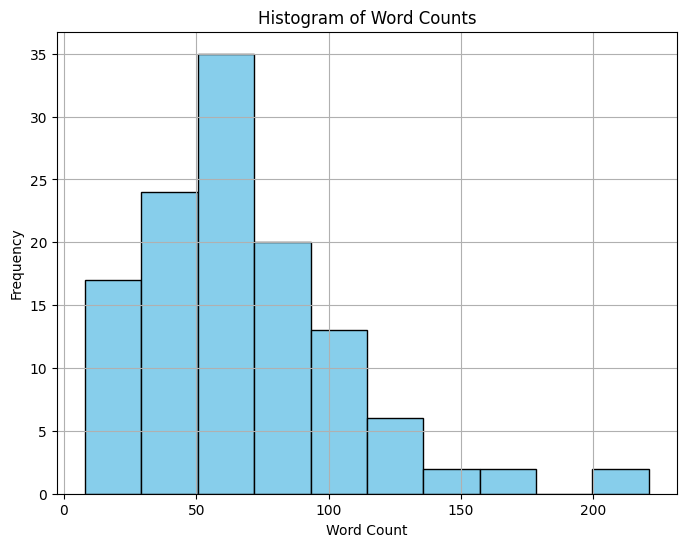

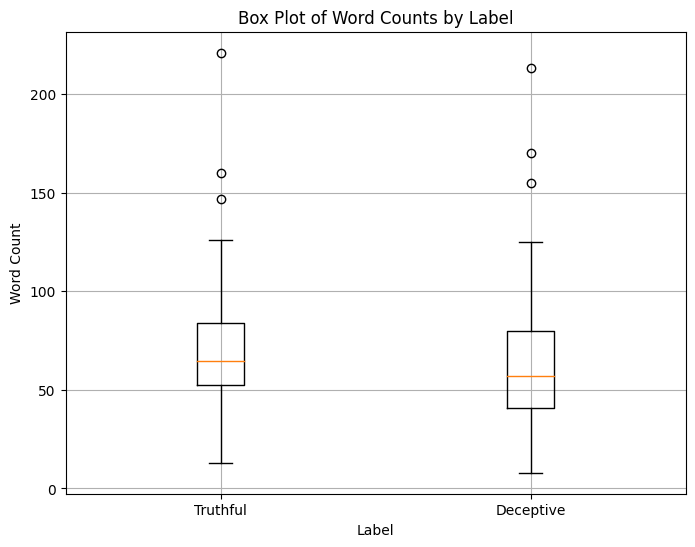

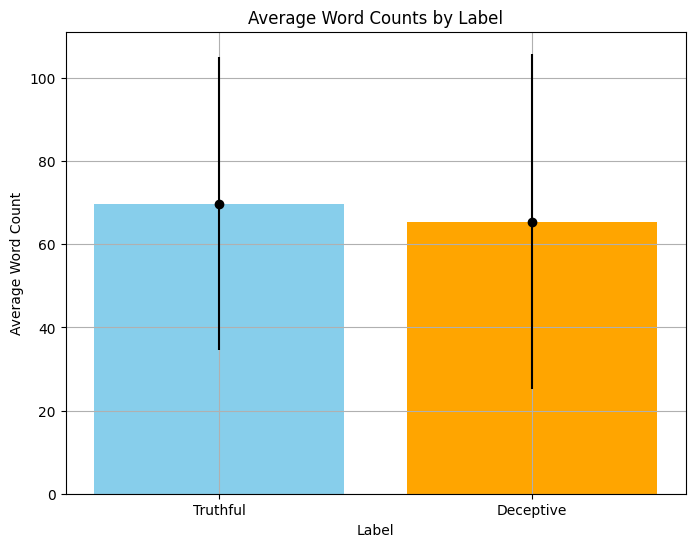

In [24]:
import matplotlib.pyplot as plt

# Histogram of Word Counts
plt.figure(figsize=(8, 6))
plt.hist(df['wordcount'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box Plot of Word Counts by Label
plt.figure(figsize=(8, 6))
plt.boxplot([truthful_data['wordcount'], deceptive_data['wordcount']], labels=['Truthful', 'Deceptive'])
plt.title('Box Plot of Word Counts by Label')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.grid(True)
plt.show()

# Bar Plot of Average Word Counts by Label
plt.figure(figsize=(8, 6))
plt.bar(['Truthful', 'Deceptive'], [truthful_data['wordcount'].mean(), deceptive_data['wordcount'].mean()], color=['skyblue', 'orange'])
plt.errorbar(['Truthful', 'Deceptive'], [truthful_data['wordcount'].mean(), deceptive_data['wordcount'].mean()],
             yerr=[truthful_data['wordcount'].std(), deceptive_data['wordcount'].std()], fmt='o', color='black')
plt.title('Average Word Counts by Label')
plt.xlabel('Label')
plt.ylabel('Average Word Count')
plt.grid(True)
plt.show()


In [25]:
df.to_csv('Trailadata_preprocessed.csv', index = False)

TEXTSTAT

In [26]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.3 MB/s eta 0:00:00


In [27]:
import textstat

In [28]:
df_textstat = pd.DataFrame()

for trail in df['Transcript']:
  # number of sentences
  sentence_count = textstat.sentence_count(trail)

  # number of words
  words_count = textstat.lexicon_count(trail)

  # number of syllables
  syllable_count = textstat.syllable_count(trail)

  # average number of syllables per word
  avg_number_of_syllablesperword = syllable_count / words_count

  # Flesch-Kincaid Grade Level (focus on sentence length)
  fleschk_gradelevel_sent = textstat.flesch_kincaid_grade(trail)

  # Compute the Flesch-Kincaid Grade Level (focus on syllables length)
  fleschk_gradelevel_syl = textstat.flesch_reading_ease(trail)

  text_stat_results = {
      'sentence_count': sentence_count,
      #'num_words': num_words,
      'syllable_count': syllable_count,
      'avg_number_of_syllablesperword': avg_number_of_syllablesperword,
      'fleschk_gradelevel_sent': fleschk_gradelevel_sent,
      'fleschk_gradelevel_syl': fleschk_gradelevel_syl
  }

  # Append the dictionary to text_stats_df as a new row
  df_textstat = pd.concat([df_textstat, pd.DataFrame(text_stat_results, index=[0])], ignore_index=True)


# Display the final dataset:
#text_stats_df['outcome_class'] = list(df['outcome_class'])
df_textstat

,sentence_count,syllable_count,avg_number_of_syllablesperword,fleschk_gradelevel_sent,fleschk_gradelevel_syl
0,5,77,1.375000,5.3,77.03
1,1,55,1.527778,16.2,43.40
2,6,85,1.250000,4.2,85.39
3,11,249,1.152778,6.2,85.42
4,3,13,1.000000,-2.2,117.87
...,...,...,...,...,...
116,3,38,1.520000,5.3,71.51
117,7,88,1.353846,4.6,78.96
118,6,155,1.504854,8.8,62.48
119,7,66,1.375000,3.6,81.39


Jaccard Index

In [29]:
# Convert each column to sets of unique words
split1 = set(truthful_data['clean_text'].str.split().explode())
split2 = set(deceptive_data['clean_text'].str.split().explode())

# Compute the intersection and union of the two sets
intersec = split1.intersection(split2)
union = split1.union(split2)

# Compute the Jaccard index
jaccard_index = len(intersec) / len(union)

print(f"Jaccard index: {jaccard_index:.2f}")

Jaccard index: 0.19


Name entity relation

In [30]:
name_entity_df = pd.read_csv('/content/drive/MyDrive/ner_traildata.csv',encoding = "UTF-8")

In [31]:
name_entity_df

,DATE,PERSON,TIME,ORG,ORDINAL,CARDINAL,WORK_OF_ART,GPE,LOC,FAC,LANGUAGE,PERCENT,Label
0,1.428571,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,truthful
1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,truthful
2,0.000000,1.250000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,truthful
3,0.380228,1.140684,0.760456,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,truthful
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,truthful
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.000000,2.941176,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,deceptive
117,0.000000,8.641975,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,deceptive
118,0.806452,0.806452,0.000000,0.0,0.0,1.612903,0.0,0.0,0.0,0.0,0.0,0.0,deceptive
119,0.000000,6.349206,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,deceptive


In [32]:
print("Entity\t\tDESCRIPTION")
print("---------------------------")

for ent in list(name_entity_df.columns[:-2]):
  print(ent+"\t\t"+spacy.explain(ent))

Entity		DESCRIPTION
---------------------------
DATE		Absolute or relative dates or periods
PERSON		People, including fictional
TIME		Times smaller than a day
ORG		Companies, agencies, institutions, etc.
ORDINAL		"first", "second", etc.
CARDINAL		Numerals that do not fall under another type
WORK_OF_ART		Titles of books, songs, etc.
GPE		Countries, cities, states
LOC		Non-GPE locations, mountain ranges, bodies of water
FAC		Buildings, airports, highways, bridges, etc.
LANGUAGE		Any named language


In [33]:
name_entity_df1 = pd.DataFrame([])

In [34]:
name_entity_df1['Temporal details'] = name_entity_df['DATE'] + name_entity_df['TIME']
name_entity_df1['Spatial details'] = name_entity_df['GPE'] + name_entity_df['LOC'] + name_entity_df['FAC']
name_entity_df1['People'] = name_entity_df['PERSON']
name_entity_df1['Quantity details'] = name_entity_df['PERCENT'] + name_entity_df['CARDINAL'] + name_entity_df['ORDINAL']

In [35]:
name_entity_df1

,Temporal details,Spatial details,People,Quantity details
0,1.428571,0.0,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000
2,0.000000,0.0,1.250000,0.000000
3,1.140684,0.0,1.140684,0.000000
4,0.000000,0.0,0.000000,0.000000
...,...,...,...,...
116,0.000000,0.0,2.941176,0.000000
117,0.000000,0.0,8.641975,0.000000
118,0.806452,0.0,0.806452,1.612903
119,0.000000,0.0,6.349206,0.000000


LIWC

In [36]:
LIWC_ANALYSIS_results = pd.read_csv('/content/drive/MyDrive/project data/LIWC-22 Results - Trailadata_preprocessed - LIWC Analysis.csv',delimiter=',')
LIWC_ANALYSIS_results

,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,1,57,15.72,94.48,8.42,46.76,57.0,17.54,85.96,75.44,...,1.75,0,1.75,0.00,0.0,0.0,0,1.75,0.00,0
1,1,36,85.20,56.63,1.17,93.93,36.0,27.78,94.44,69.44,...,5.56,0,0.00,0.00,0.0,0.0,0,0.00,0.00,0
2,1,70,2.35,24.76,94.92,41.28,70.0,8.57,92.86,85.71,...,0.00,0,2.86,0.00,0.0,0.0,0,2.86,0.00,0
3,1,221,66.72,77.96,25.43,15.20,221.0,7.24,90.95,76.47,...,3.17,0,2.26,0.00,0.0,0.0,0,2.26,0.00,0
4,1,13,4.85,1.00,99.00,NaN,13.0,0.00,100.00,100.00,...,7.69,0,0.00,0.00,0.0,0.0,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1,27,23.88,1.00,99.00,1.00,27.0,29.63,77.78,59.26,...,7.41,0,11.11,3.70,0.0,0.0,0,7.41,0.00,0
117,1,67,3.63,90.68,2.69,7.03,67.0,13.43,77.61,73.13,...,1.49,0,4.48,1.49,0.0,0.0,0,2.99,0.00,0
118,1,108,73.36,62.05,39.59,33.13,108.0,19.44,90.74,79.63,...,4.63,0,5.56,0.00,0.0,0.0,0,3.70,1.85,0
119,1,51,1.00,1.00,97.97,4.72,51.0,11.76,76.47,70.59,...,0.00,0,5.88,0.00,0.0,0.0,0,5.88,0.00,0


In [37]:
# prompt: want to print first column of data frame LIWC_ANALYSIS_results

print(LIWC_ANALYSIS_results.iloc[:, 0])


0      1
1      1
2      1
3      1
4      1
      ..
116    1
117    1
118    1
119    1
120    1
Name: Segment, Length: 121, dtype: int64


In [38]:
list(LIWC_ANALYSIS_results.columns)

['Segment',
 'WC',
 'Analytic',
 'Clout',
 'Authentic',
 'Tone',
 'WPS',
 'BigWords',
 'Dic',
 'Linguistic',
 'function',
 'pronoun',
 'ppron',
 'i',
 'we',
 'you',
 'shehe',
 'they',
 'ipron',
 'det',
 'article',
 'number',
 'prep',
 'auxverb',
 'adverb',
 'conj',
 'negate',
 'verb',
 'adj',
 'quantity',
 'Drives',
 'affiliation',
 'achieve',
 'power',
 'Cognition',
 'allnone',
 'cogproc',
 'insight',
 'cause',
 'discrep',
 'tentat',
 'certitude',
 'differ',
 'memory',
 'Affect',
 'tone_pos',
 'tone_neg',
 'emotion',
 'emo_pos',
 'emo_neg',
 'emo_anx',
 'emo_anger',
 'emo_sad',
 'swear',
 'Social',
 'socbehav',
 'prosocial',
 'polite',
 'conflict',
 'moral',
 'comm',
 'socrefs',
 'family',
 'friend',
 'female',
 'male',
 'Culture',
 'politic',
 'ethnicity',
 'tech',
 'Lifestyle',
 'leisure',
 'home',
 'work',
 'money',
 'relig',
 'Physical',
 'health',
 'illness',
 'wellness',
 'mental',
 'substances',
 'sexual',
 'food',
 'death',
 'need',
 'want',
 'acquire',
 'lack',
 'fulfill',
 '

In [39]:
# prompt: i want to know number of columns in LIWC_ANALYSIS_results

LIWC_ANALYSIS_results.shape


(121, 119)

In [40]:
# Here we are taking columns mentioned in base paper
LIWC_ANALYSIS_considerated_cols= LIWC_ANALYSIS_results[['Analytic',
                      'Authentic',
                      'Tone',
                      'tone_pos',
                      'tone_neg',
                      'focuspast',
                      'focuspresent',
                      'focusfuture',
                      'Cognition',
                      'memory'
                      ]].copy()

# Calculate Distancing by summing self-referential and other-referential terms
LIWC_ANALYSIS_considerated_cols['Self-reference'] = LIWC_ANALYSIS_results[['i', 'we']].sum(axis=1)
LIWC_ANALYSIS_considerated_cols['Other-reference'] = LIWC_ANALYSIS_results[['shehe', 'they', 'you']].sum(axis=1)

# Calculate Contextual Embedding by summing space, motion, and time terms
LIWC_ANALYSIS_considerated_cols['Contextual Embedding'] = LIWC_ANALYSIS_results[['space', 'motion', 'time']].sum(axis=1)

# Calculate Perceptual Details by summing attention, visual, auditory, and feeling terms
LIWC_ANALYSIS_considerated_cols['Perceptual Details'] = LIWC_ANALYSIS_results[['attention', 'visual', 'auditory', 'feeling']].sum(axis=1)


In [41]:
# Calculate Reality Monitoring using the calculated columns and additional LIWC dimensions
LIWC_ANALYSIS_considerated_cols['Reality Monitoring'] = LIWC_ANALYSIS_considerated_cols['Perceptual Details'] + LIWC_ANALYSIS_considerated_cols['Contextual Embedding'] + LIWC_ANALYSIS_results['Affect'] - LIWC_ANALYSIS_results['Cognition']

# Display the resulting DataFrame
LIWC_ANALYSIS_considerated_cols

,Analytic,Authentic,Tone,tone_pos,tone_neg,focuspast,focuspresent,focusfuture,Cognition,memory,Self-reference,Other-reference,Contextual Embedding,Perceptual Details,Reality Monitoring
0,15.72,8.42,46.76,1.75,0.00,1.75,1.75,0.00,19.30,0.00,1.75,8.77,3.50,0.00,-14.05
1,85.20,1.17,93.93,5.56,0.00,0.00,0.00,0.00,19.44,0.00,2.78,5.56,0.00,0.00,-13.88
2,2.35,94.92,41.28,1.43,0.00,21.43,0.00,1.43,8.57,0.00,8.57,8.57,17.14,1.43,11.43
3,66.72,25.43,15.20,0.00,0.45,9.95,1.36,0.00,7.69,0.45,3.61,7.69,16.73,0.45,9.94
4,4.85,99.00,NaN,0.00,0.00,15.38,0.00,0.00,53.85,0.00,15.38,0.00,15.38,0.00,-38.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,23.88,99.00,1.00,0.00,3.70,0.00,7.41,0.00,18.52,0.00,18.52,0.00,0.00,0.00,-14.82
117,3.63,2.69,7.03,1.49,2.99,11.94,4.48,0.00,10.45,0.00,2.99,8.96,1.49,1.49,-2.99
118,73.36,39.59,33.13,1.85,0.93,2.78,2.78,1.85,15.74,0.00,0.00,1.86,11.12,0.00,-1.84
119,1.00,97.97,4.72,0.00,1.96,7.84,3.92,0.00,17.65,0.00,13.73,3.92,13.73,0.00,-1.96


concreetness

In [42]:
import numpy as np

# Function to calculate concreteness score using word embeddings
def calculate_concreteness(tokenized_Transcript):
    doc = nlp(tokenized_Transcript)
    concreteness_scores = [token.vector_norm for token in doc if token.has_vector]
    if concreteness_scores:
        return np.mean(concreteness_scores)
    else:
        return np.nan

# Apply the function to each row in the DataFrame
df['Concreteness'] = df['tokenized_Transcript'].apply(calculate_concreteness)

# Display the DataFrame with concreteness scores
print(df)


               File Name                                         Transcript  \
0    trial_truth_002.txt  All of us, who have represented people for yea...   
1    trial_truth_001.txt  Reforming the criminal justice system matters ...   
2    trial_truth_006.txt  They really didn't tell me anything. They said...   
3    trial_truth_004.txt  I do. I was, uh... in the office, and I got a ...   
4    trial_truth_003.txt  But yes, I was there. Yep, I stayed. Uh ... Ye...   
..                   ...                                                ...   
116    trial_lie_054.txt  ... Do I believe the evidence that supports do...   
117    trial_lie_055.txt  There was a lot of talk about me being, you kn...   
118    trial_lie_059.txt  ...um person in the congregation was involved ...   
119    trial_lie_060.txt  My statement is this: I've never been alone wi...   
120    trial_lie_061.txt  Not at all. Oh, that's her word agains mine is...   

         Label                               tokeni

In [43]:
df.head()

,File Name,Transcript,Label,tokenized_Transcript,clean_text,wordcount,Concreteness
0,trial_truth_002.txt,"All of us, who have represented people for yea...",truthful,all of us who have represented people for year...,represent people year system letter prisioner ...,57,73.272064
1,trial_truth_001.txt,Reforming the criminal justice system matters ...,truthful,reforming the criminal justice system matters ...,reform criminal justice system matter law legi...,36,68.332687
2,trial_truth_006.txt,They really didn't tell me anything. They said...,truthful,they really did n't tell me anything they said...,tell say accident say accident ian fine accide...,70,71.255470
3,trial_truth_004.txt,"I do. I was, uh... in the office, and I got a ...",truthful,i do i was uh in the office and i got a call u...,uh office get uh maybe close o clock remember ...,221,77.090073
4,trial_truth_003.txt,"But yes, I was there. Yep, I stayed. Uh ... Ye...",truthful,but yes i was there yep i stayed uh yep prob y...,yes yep stay uh yep prob yes yes,13,57.342552


In [44]:
# Merge the datasets containing the results
outcome_labels = pd.Series(df['Label']).reset_index().drop('index', axis = 1)
wordcount = pd.Series(df['wordcount']).reset_index().drop('index', axis = 1)
Concreteness = df['Concreteness']
tokenized_Transcript = df['tokenized_Transcript']
cleaned_text = df['clean_text']

# ho rimosso pos_tags
Final_Traildf = pd.concat([outcome_labels,wordcount,df_textstat,LIWC_ANALYSIS_considerated_cols,Concreteness,name_entity_df1] , axis=1)
Final_Traildf

,Label,wordcount,sentence_count,syllable_count,avg_number_of_syllablesperword,fleschk_gradelevel_sent,fleschk_gradelevel_syl,Analytic,Authentic,Tone,...,Self-reference,Other-reference,Contextual Embedding,Perceptual Details,Reality Monitoring,Concreteness,Temporal details,Spatial details,People,Quantity details
0,truthful,57,5,77,1.375000,5.3,77.03,15.72,8.42,46.76,...,1.75,8.77,3.50,0.00,-14.05,73.272064,1.428571,0.0,0.000000,0.000000
1,truthful,36,1,55,1.527778,16.2,43.40,85.20,1.17,93.93,...,2.78,5.56,0.00,0.00,-13.88,68.332687,0.000000,0.0,0.000000,0.000000
2,truthful,70,6,85,1.250000,4.2,85.39,2.35,94.92,41.28,...,8.57,8.57,17.14,1.43,11.43,71.255470,0.000000,0.0,1.250000,0.000000
3,truthful,221,11,249,1.152778,6.2,85.42,66.72,25.43,15.20,...,3.61,7.69,16.73,0.45,9.94,77.090073,1.140684,0.0,1.140684,0.000000
4,truthful,13,3,13,1.000000,-2.2,117.87,4.85,99.00,NaN,...,15.38,0.00,15.38,0.00,-38.47,57.342552,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,deceptive,27,3,38,1.520000,5.3,71.51,23.88,99.00,1.00,...,18.52,0.00,0.00,0.00,-14.82,74.941803,0.000000,0.0,2.941176,0.000000
117,deceptive,67,7,88,1.353846,4.6,78.96,3.63,2.69,7.03,...,2.99,8.96,1.49,1.49,-2.99,62.483448,0.000000,0.0,8.641975,0.000000
118,deceptive,108,6,155,1.504854,8.8,62.48,73.36,39.59,33.13,...,0.00,1.86,11.12,0.00,-1.84,69.153282,0.806452,0.0,0.806452,1.612903
119,deceptive,51,7,66,1.375000,3.6,81.39,1.00,97.97,4.72,...,13.73,3.92,13.73,0.00,-1.96,67.120735,0.000000,0.0,6.349206,0.000000


In [45]:
Final_Traildf.to_csv('Final_Trail_dataset.csv', index = False)

DATA ANALYSIS

In [46]:
Final_Traildf_true = Final_Traildf[Final_Traildf['Label']=='truthful'].drop('Label', axis=1)
Final_Traild_false = Final_Traildf[Final_Traildf['Label']=='deceptive'].drop('Label', axis=1)

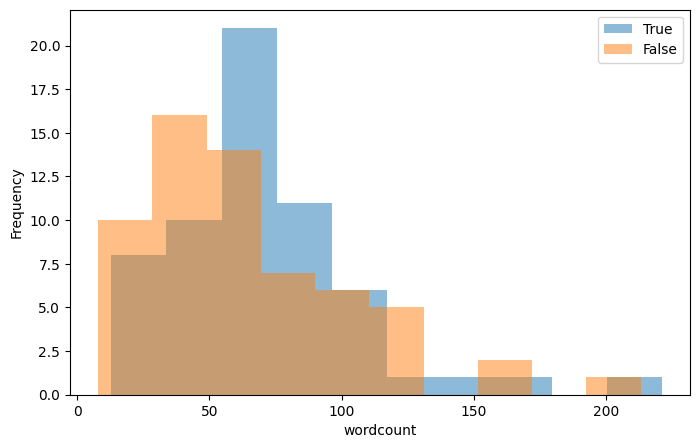

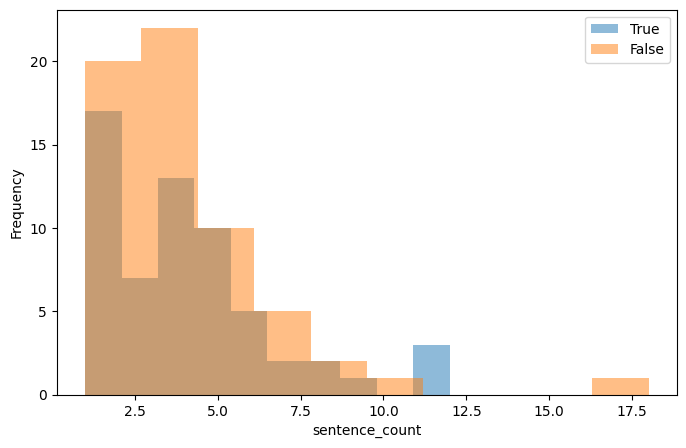

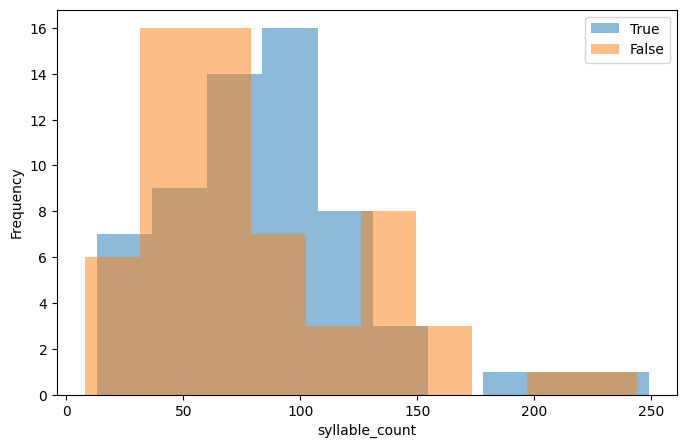

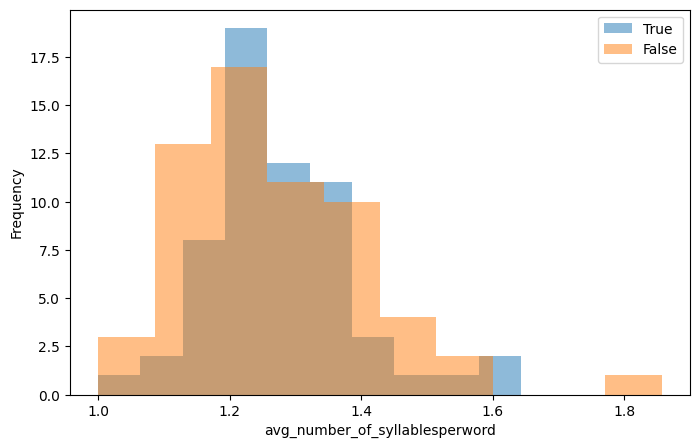

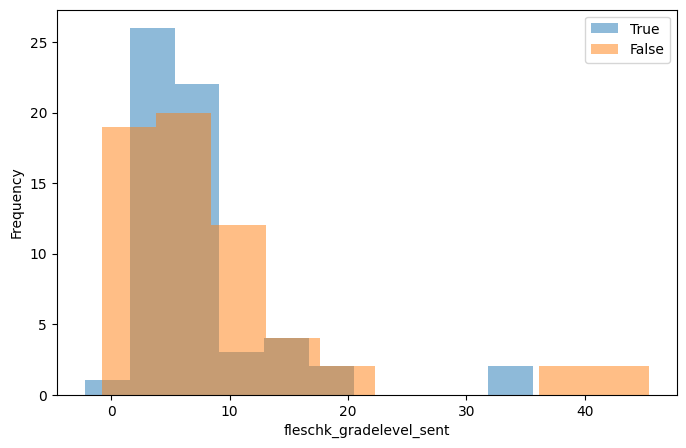

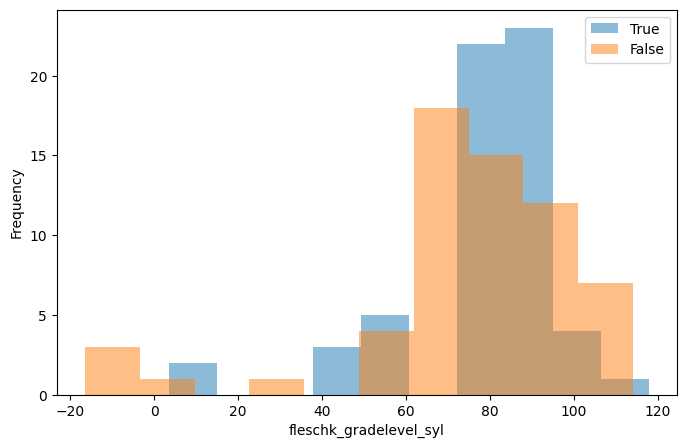

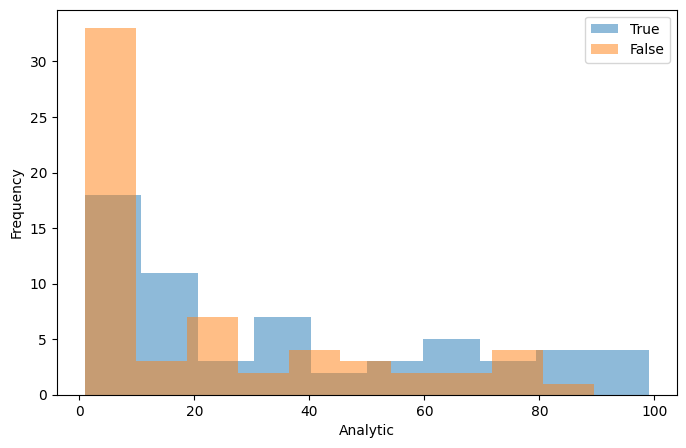

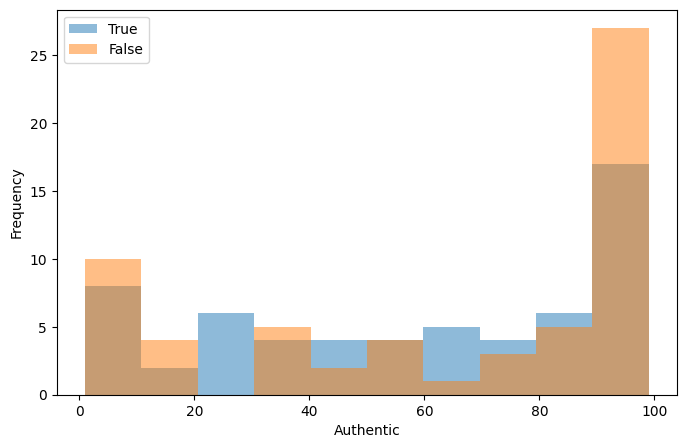

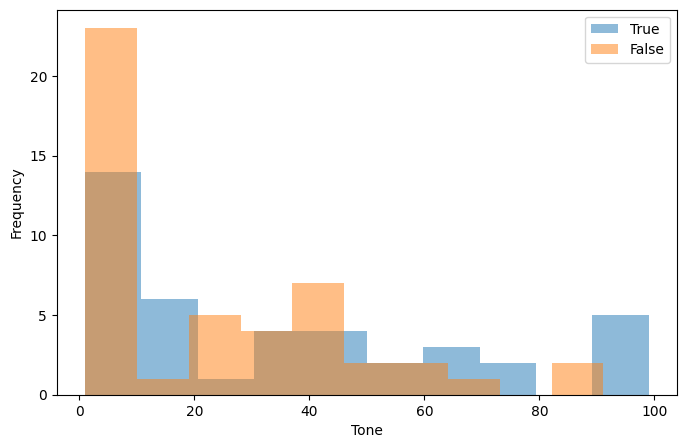

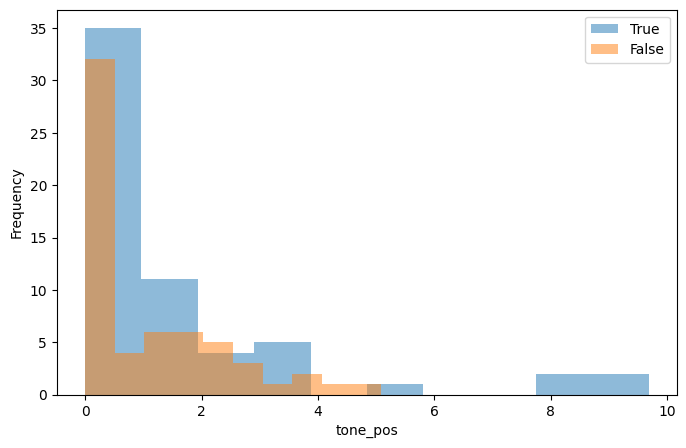

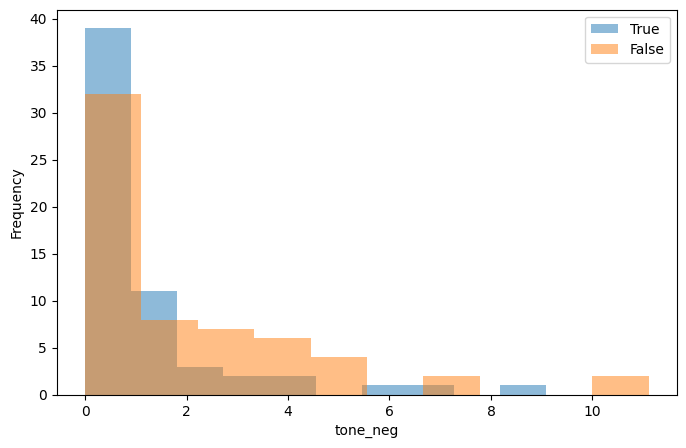

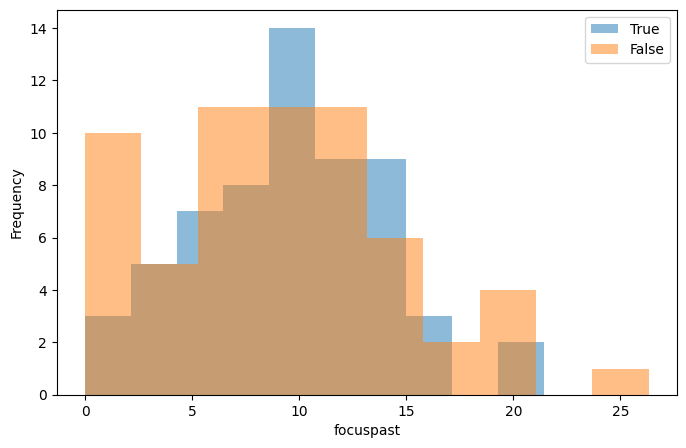

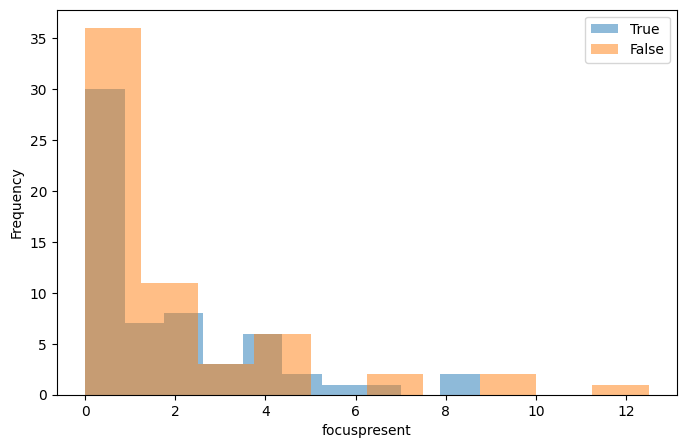

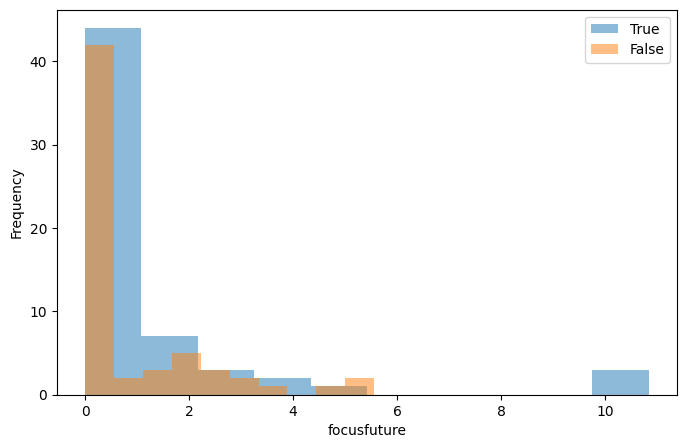

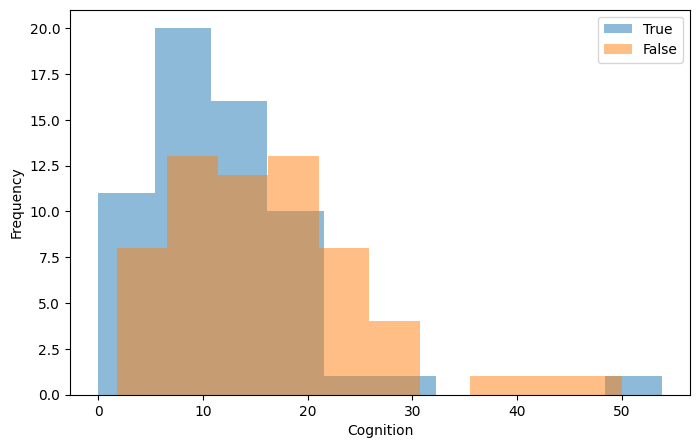

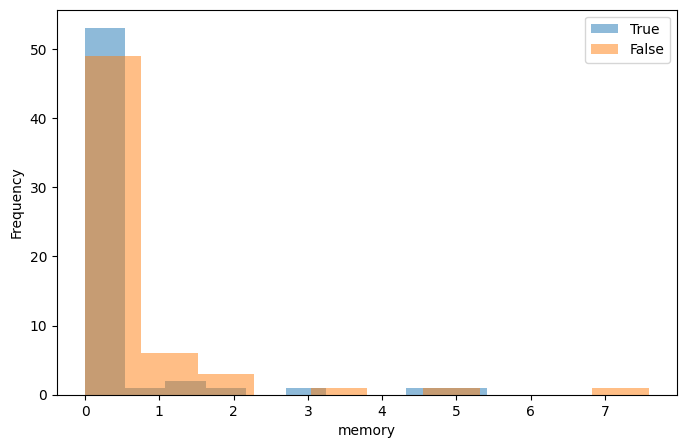

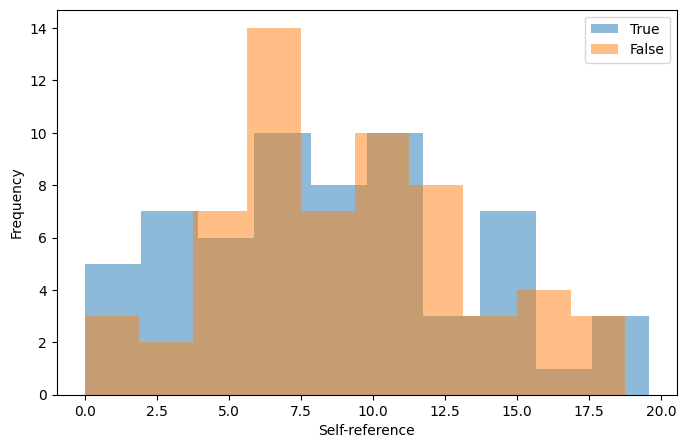

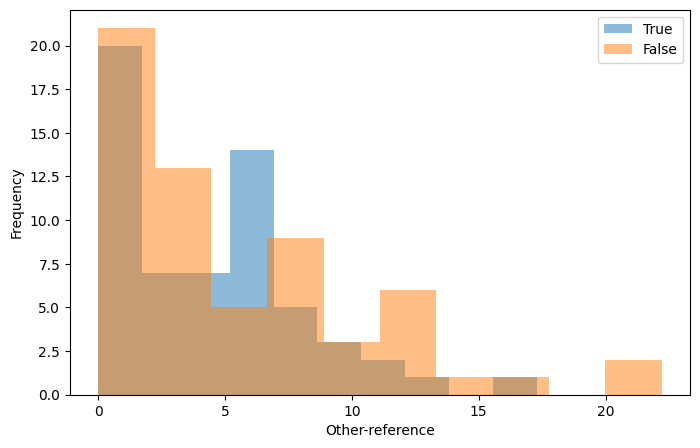

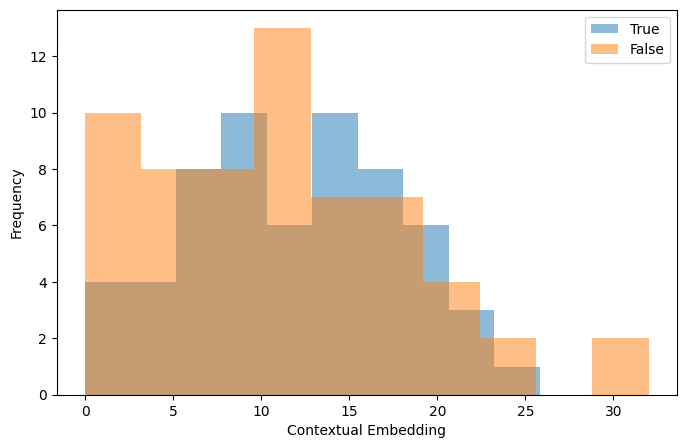

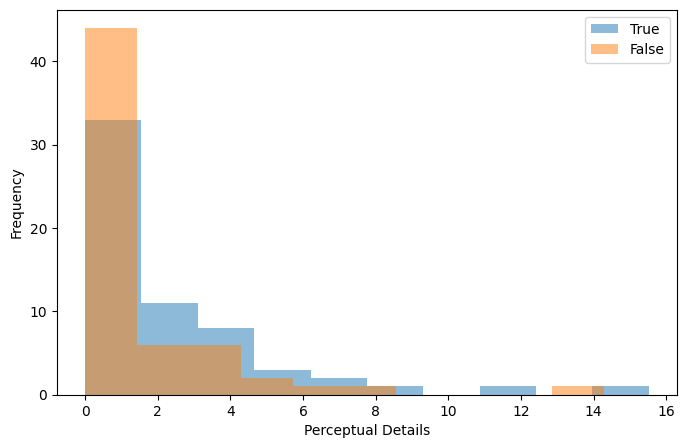

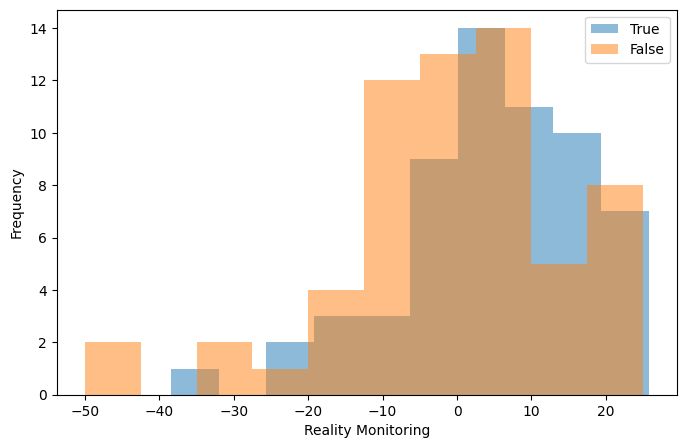

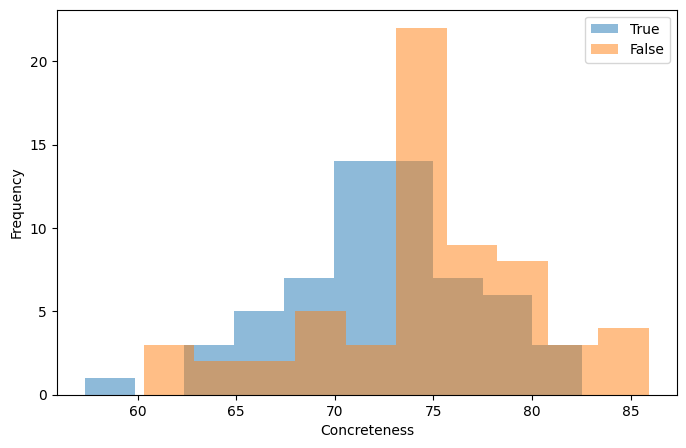

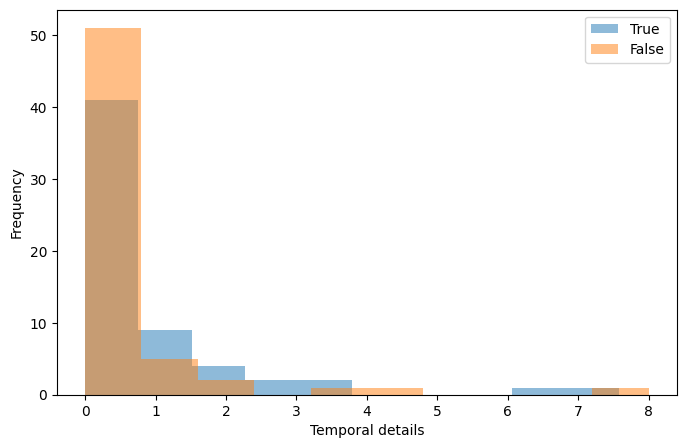

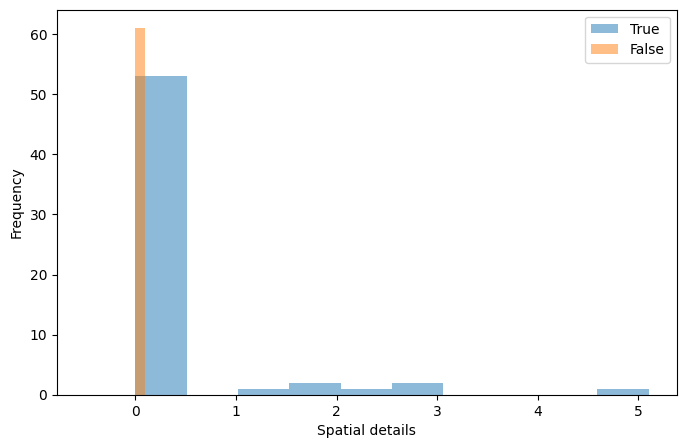

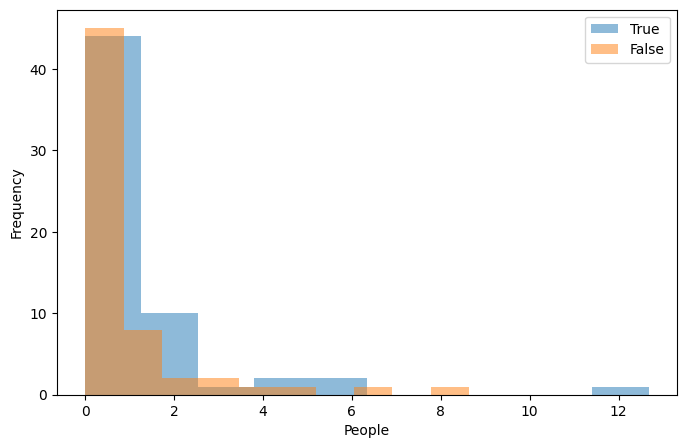

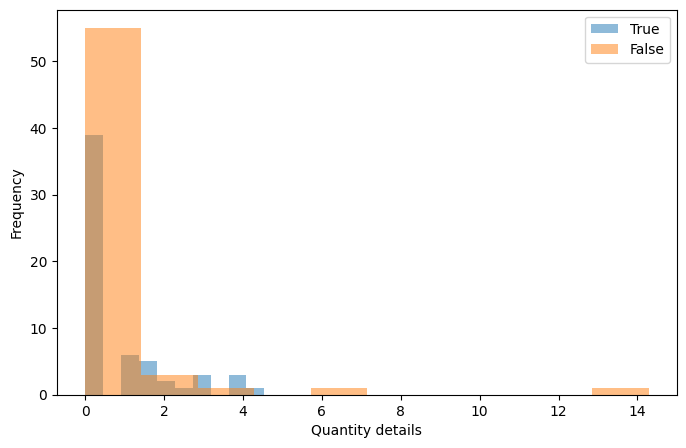

In [47]:
import matplotlib.pyplot as plt

# Convert columns to numeric data types
Final_Traildf_true = Final_Traildf_true.apply(pd.to_numeric, errors='coerce')
Final_Traild_false = Final_Traild_false.apply(pd.to_numeric, errors='coerce')
# Plot histograms
for score in Final_Traildf_true:
    Final_Traildf_true[score].plot.hist(alpha=0.5, figsize=(8, 5), bins=10, label = 'True')
    Final_Traild_false[score].plot.hist(alpha=0.5, figsize=(8, 5), bins=10, label = 'False')

    for df in [Final_Traildf_true, Final_Traild_false]:
      for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    # Add labels to variables
    plt.xlabel(score)
    plt.ylabel('Frequency')
    plt.legend()

    # Show plot
    plt.show()

In [49]:
!pip install pingouin
import pingouin as pg
from scipy.stats import shapiro, levene, permutation_test
from statsmodels.stats.multitest import multipletests
## Define functions for analysis:

# Computing independent permutation tests:
def comparitive_stats(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

In [50]:
# Bootstrap CI for CLES
def CLES_ConfInv_bootstrap_method(x, y, alpha=0.05, n_boot=1000):
    CLES_bootstarp_res = []
    for _ in range(n_boot):
        sunset_x = np.random.choice(x, size=len(x), replace=True)
        subset_y = np.random.choice(y, size=len(y), replace=True)
        cles = pg.compute_effsize(sunset_x, subset_y, eftype='CLES')
        CLES_bootstarp_res.append(cles)
    lower_bound_ci = np.percentile(CLES_bootstarp_res, 100 * (alpha / 2))
    upper_bound_ci = np.percentile(CLES_bootstarp_res, 100 * (1 - alpha / 2))
    return (round((lower_bound_ci), 2), round((upper_bound_ci), 2))


In [51]:
# Compute Cohen's d and its CI
def Cohens_d_ConfInv(x, y, confidence=0.95):
    diff_bwn_means = pg.compute_effsize(x, y, paired=False, eftype='cohen')
    low_bound_ci, high_bound_ci = pg.compute_esci(stat=diff_bwn_means, nx=len(x), ny=len(y), paired=False, eftype='cohen', confidence=confidence)
    return diff_bwn_means, (low_bound_ci, high_bound_ci)


In [52]:
# Apply the analysis:

Cohensscore = []
Cohens_ConfInv= []
res_test_stats = []
p_values = []
CLESscore = []
ConfInv_CLES = []



In [53]:
# Iterate over each column in Final_Traildf_true
for col in Final_Traildf_true.columns:
  # Convert column values to float (if they are not already numeric)
    Final_Traildf_true[col] = pd.to_numeric(Final_Traildf_true[col], errors='coerce')
    Final_Traild_false[col] = pd.to_numeric(Final_Traild_false[col], errors='coerce')

    # Drop NaN values
    Final_Traildf_true.dropna(subset=[col], inplace=True)
    Final_Traild_false.dropna(subset=[col], inplace=True)

    # Check the number of unique values in each sample
    unique_true = Final_Traildf_true[col].nunique()
    unique_false = Final_Traild_false[col].nunique()

    print(f"Column: {col}, Unique True: {unique_true}, Unique False: {unique_false}")

    # Perform statistical tests only if both samples have enough unique values
    if unique_true >= 2 and unique_false >= 2:
      # Perform statistical tests and effect size computations as before
      results = permutation_test((Final_Traildf_true[col], Final_Traild_false[col]), comparitive_stats, vectorized=True, n_resamples=10000)
      res_test_stats.append(results.statistic)
      p_values.append(results.pvalue)

      # Compute CLES effect size and CI
      CLES = pg.compute_effsize(Final_Traildf_true[col], Final_Traild_false[col], eftype='CLES')
      CLESscore.append(CLES)
      CLES_ConfInv = CLES_ConfInv_bootstrap_method(Final_Traildf_true[col], Final_Traild_false[col])
      ConfInv_CLES.append(CLES_ConfInv)

      # Compute Cohen's d effect size and CI
      cohens_d, cohens_d_ci = Cohens_d_ConfInv(Final_Traildf_true[col], Final_Traild_false[col])
      Cohensscore.append(cohens_d)
      Cohens_ConfInv.append(cohens_d_ci)


Column: wordcount, Unique True: 46, Unique False: 49
Column: sentence_count, Unique True: 11, Unique False: 10
Column: syllable_count, Unique True: 50, Unique False: 51
Column: avg_number_of_syllablesperword, Unique True: 55, Unique False: 58
Column: fleschk_gradelevel_sent, Unique True: 49, Unique False: 50
Column: fleschk_gradelevel_syl, Unique True: 58, Unique False: 61
Column: Analytic, Unique True: 54, Unique False: 48
Column: Authentic, Unique True: 45, Unique False: 39
Column: Tone, Unique True: 31, Unique False: 32
Column: tone_pos, Unique True: 28, Unique False: 28
Column: tone_neg, Unique True: 23, Unique False: 25
Column: focuspast, Unique True: 40, Unique False: 44
Column: focuspresent, Unique True: 21, Unique False: 30
Column: focusfuture, Unique True: 10, Unique False: 17
Column: Cognition, Unique True: 40, Unique False: 46
Column: memory, Unique True: 5, Unique False: 11
Column: Self-reference, Unique True: 40, Unique False: 44
Column: Other-reference, Unique True: 32, U

In [54]:
print("Length of Final_Traildf_true.columns:", len(Final_Traildf_true.columns))
print("Length of res_test_stats:", len(res_test_stats))
print("Length of p_values:", len(p_values))
print("Length of CLESscore:", len(CLESscore))
print("Length of ConfInv_CLES:", len(ConfInv_CLES))
print("Length of Cohensscore:", len(Cohensscore))
print("Length of Cohens_ConfInv:", len(Cohens_ConfInv))

Length of Final_Traildf_true.columns: 26
Length of res_test_stats: 25
Length of p_values: 25
Length of CLESscore: 25
Length of ConfInv_CLES: 25
Length of Cohensscore: 25
Length of Cohens_ConfInv: 25


In [55]:
# Ensure all arrays have the same length
min_length = min(len(Final_Traildf_true.columns), len(res_test_stats), len(p_values), len(CLESscore), len(ConfInv_CLES), len(Cohensscore), len(Cohens_ConfInv))
Final_Traildf_true = Final_Traildf_true.iloc[:, :min_length]
res_test_stats = res_test_stats[:min_length]
p_values = p_values[:min_length]
CLESscore = CLESscore[:min_length]
ConfInv_CLES = ConfInv_CLES[:min_length]
Cohensscore = Cohensscore[:min_length]
Cohens_ConfInv = Cohens_ConfInv[:min_length]


In [56]:
# Perform multiple comparisons correction using Bonferroni method
null_hyp_rej, corrected_p_values, _, _ = multipletests(p_values, alpha=0.02, method='holm')

# save results in a dataframe
stat_permresults_df = pd.DataFrame({
    "feature": Final_Traildf_true.columns,
    "res_test_stats": res_test_stats,
    "p_value": p_values,
    "corrected_p_value": corrected_p_values,
    "effect_size_cles(res_test_stats)": CLESscore,
    "cles_95%_CI(ConfInv_CLES)": ConfInv_CLES,
    "effect_size_cohens_d(Cohensscore)": Cohensscore,
    "cohens_d_95%_CI(Cohens_ConfInv)": Cohens_ConfInv,
    "null_hyp_rejected": null_hyp_rej
})
stat_permresults_df["significance"] = ['*' if null_h else '-' for null_h in stat_permresults_df['null_hyp_rejected']]

# print all comparisons
stat_permresults_df.sort_values(["null_hyp_rejected", "effect_size_cles(res_test_stats)"], ascending=False, inplace=True)
stat_permresults_df




,feature,res_test_stats,p_value,corrected_p_value,effect_size_cles(res_test_stats),cles_95%_CI(ConfInv_CLES),effect_size_cohens_d(Cohensscore),cohens_d_95%_CI(Cohens_ConfInv),null_hyp_rejected,significance
6,Analytic,13.264740,0.011599,0.289971,0.645902,"(0.54, 0.73)",0.466690,"(0.1, 0.83)",False,-
19,Perceptual Details,1.061495,0.031997,0.767923,0.623508,"(0.5, 0.73)",0.472209,"(0.04, 0.9)",False,-
8,Tone,12.408661,0.043596,0.959104,0.623249,"(0.5, 0.74)",0.441812,"(0.01, 0.87)",False,-
20,Reality Monitoring,3.482034,0.133187,1.000000,0.597302,"(0.47, 0.71)",0.318623,"(-0.11, 0.75)",False,-
22,Temporal details,0.478034,0.084792,1.000000,0.597042,"(0.5, 0.69)",0.363908,"(-0.06, 0.79)",False,-
24,People,-0.007914,0.951305,1.000000,0.569538,"(0.48, 0.66)",-0.004803,"(-0.43, 0.42)",False,-
2,syllable_count,6.775137,0.416558,1.000000,0.567486,"(0.46, 0.67)",0.148641,"(-0.21, 0.51)",False,-
0,wordcount,4.240984,0.544146,1.000000,0.566530,"(0.46, 0.67)",0.111883,"(-0.25, 0.47)",False,-
1,sentence_count,0.364754,0.491951,1.000000,0.560519,"(0.45, 0.67)",0.136523,"(-0.22, 0.5)",False,-
9,tone_pos,0.761214,0.084992,1.000000,0.550078,"(0.43, 0.66)",0.372259,"(-0.06, 0.8)",False,-


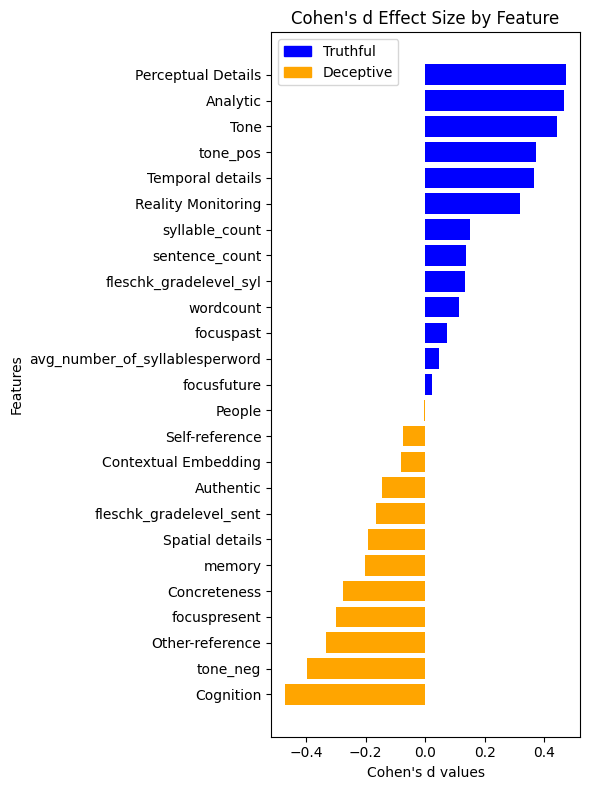

In [60]:
import matplotlib.pyplot as plt

# Select only significant features
stat_permresults_df_selected = stat_permresults_df.loc[stat_permresults_df['null_hyp_rejected'] == False, :]

# Sort the dataframe by effect size in descending order
stat_permresults_df_sorted = stat_permresults_df_selected.sort_values("effect_size_cohens_d(Cohensscore)", ascending=True)

# Create a horizontal bar chart of effect size with an increased figure size
fig, ax = plt.subplots(figsize=(6, 8))  # Adjust the size (width, height) as needed

# Define colors based on the stat value
colors = ['blue' if stat > 0 else 'orange' for stat in stat_permresults_df_sorted['res_test_stats']]

# Plot the bars
bars = ax.barh(stat_permresults_df_sorted['feature'], stat_permresults_df_sorted['effect_size_cohens_d(Cohensscore)'], color=colors)

# Add legend
t_patch = plt.Rectangle((0, 0), 0, 0, color='blue', label='Truthful')
f_patch = plt.Rectangle((0, 0), 0, 0, color='orange', label='Deceptive')
plt.legend(handles=[t_patch, f_patch])

# Set labels
ax.set_xlabel("Cohen's d values")
ax.set_ylabel('Features')
ax.set_title("Cohen's d Effect Size by Feature")

# Show the plot
plt.tight_layout()
plt.show()

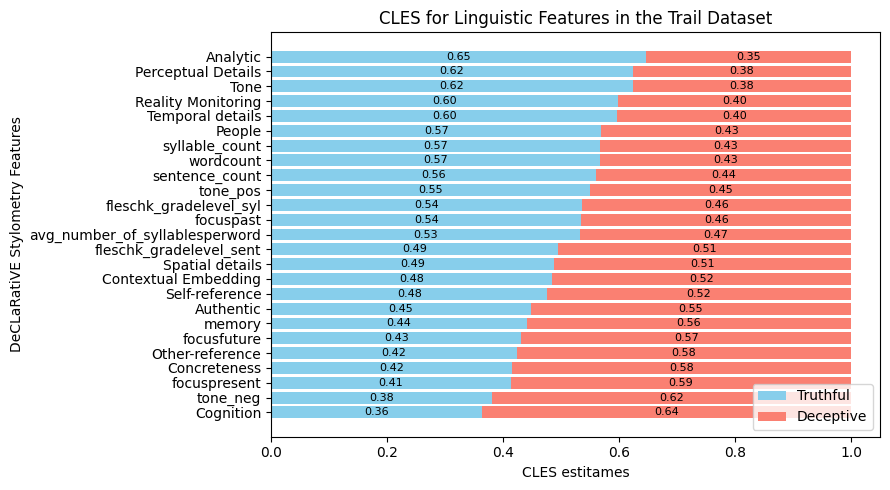

In [61]:
import matplotlib.pyplot as plt

# Select only significant features
stat_permresults_df_selected = stat_permresults_df.loc[stat_permresults_df['null_hyp_rejected'] == False, :]

# Sort the dataframe by effect size in ascending order
stat_permresults_df_sorted = stat_permresults_df_selected.sort_values("effect_size_cles(res_test_stats)", ascending=True)

# Set the figure size
fig, ax = plt.subplots(figsize=(9, 5))

# Calculate 1 - cles for the deceptive part
stat_permresults_df_sorted['one_minus_cles'] = 1 - stat_permresults_df_sorted['effect_size_cles(res_test_stats)']

# Plotting the 'cles' part (Truthful) in blue
ax.barh(stat_permresults_df_sorted['feature'], stat_permresults_df_sorted['effect_size_cles(res_test_stats)'], color='skyblue', label='Truthful')

# Plotting the '1 - cles' part (Deceptive) in orange
ax.barh(stat_permresults_df_sorted['feature'], stat_permresults_df_sorted['one_minus_cles'], left=stat_permresults_df_sorted['effect_size_cles(res_test_stats)'], color='salmon', label='Deceptive')

# Add legend
plt.legend(loc='lower right')

# Set labels and title
ax.set_xlabel('CLES estitames')
ax.set_ylabel('DeCLaRatiVE Stylometry Features')
ax.set_title('CLES for Linguistic Features in the Trail Dataset')

# Adding the text labels on bars
for index, (cles, one_minus_cles) in enumerate(zip(stat_permresults_df_sorted['effect_size_cles(res_test_stats)'], stat_permresults_df_sorted['one_minus_cles'])):
    # Annotate the blue part (cles)
    ax.text(cles/2, index, f"{cles:.2f}", va='center', ha='center', color='black', fontsize=8)
    # Annotate the orange part (1 - cles)
    ax.text(cles + one_minus_cles/2, index, f"{one_minus_cles:.2f}", va='center', ha='center', color='black', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

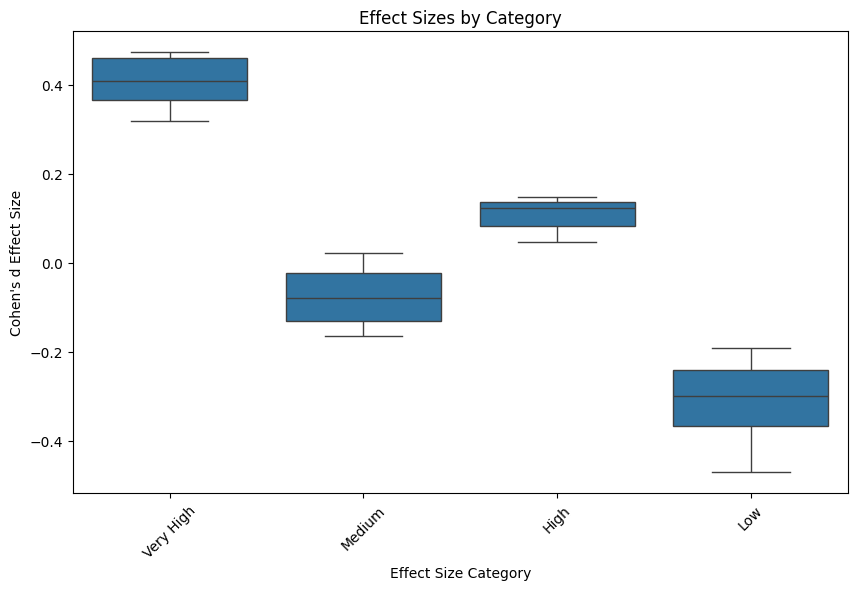

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Determine quartiles of effect sizes to create categories
quartiles = np.percentile(stat_permresults_df_selected['effect_size_cohens_d(Cohensscore)'], [25, 50, 75])

# Create categories based on quartiles
def categorize_effect_size(effect_size, quartiles):
    if effect_size <= quartiles[0]:
        return 'Low'
    elif quartiles[0] < effect_size <= quartiles[1]:
        return 'Medium'
    elif quartiles[1] < effect_size <= quartiles[2]:
        return 'High'
    else:
        return 'Very High'

# Apply categorization function to create a new column 'category'
stat_permresults_df_selected['category'] = stat_permresults_df_selected['effect_size_cohens_d(Cohensscore)'].apply(lambda x: categorize_effect_size(x, quartiles))

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='effect_size_cohens_d(Cohensscore)', data=stat_permresults_df_selected)
plt.xlabel('Effect Size Category')
plt.ylabel("Cohen's d Effect Size")
plt.title('Effect Sizes by Category')
plt.xticks(rotation=45)
plt.show()

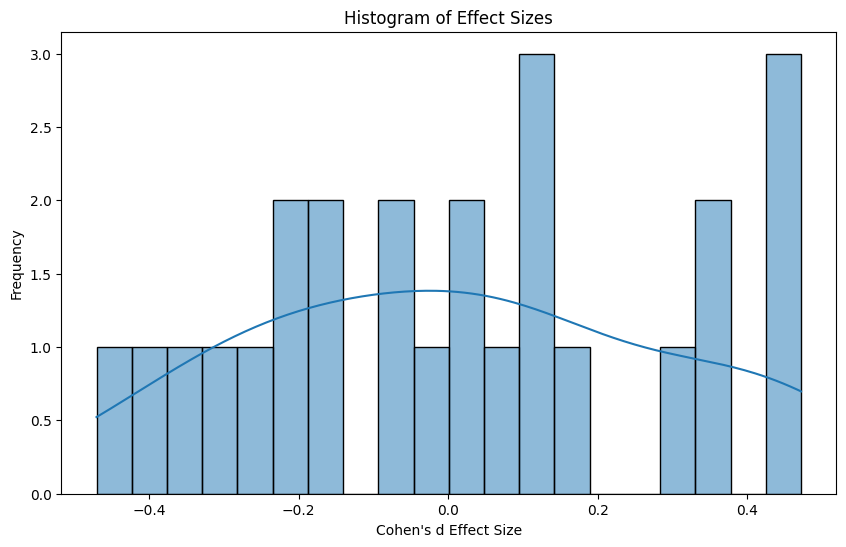

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of effect sizes
plt.figure(figsize=(10, 6))
sns.histplot(data=stat_permresults_df_selected, x='effect_size_cohens_d(Cohensscore)', bins=20, kde=True)
plt.xlabel("Cohen's d Effect Size")
plt.ylabel('Frequency')
plt.title('Histogram of Effect Sizes')
plt.show()